In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
csvfile = "Project_data_Children_under_5.csv"

In [3]:
dataframe = pd.read_csv(csvfile)

dataframe.head()

,state,Survey,Area,Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males),Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%),Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%),Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [4]:
dataframe.columns


Index(['state', 'Survey', 'Area',
       'Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)',
       'Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)',
       'Child Feeding Practices And Nutritional Status 

In [5]:
dataframe2 = dataframe.rename(columns={"Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)":"Gender_Aged_5years(Females per 1000 Males)",
                          "Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)":"Children_Registered",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)":"Children_Stunted_5years(Height-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)":"Children_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)":"Children_Severely_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)":"Children_Underweight_5years(Weight-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)":"Children_Breastfed_Within_One_Hour_Of_Birth_3years",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%)":"Children_Under_Age_6_Months_Exclusively_Breastfed",
                          "Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate_Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%)":"Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk",
                          "Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%":"Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"})
dataframe2.head()

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [6]:
dataframe2.head()
#cite
#https://www.geeksforgeeks.org/python-pandas-dataframe-rename/

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [7]:
df_nona = dataframe2.fillna(0)

In [8]:
Survey_NFHS3 = df_nona.loc[df_nona["Survey"] == "NFHS-3"]
Survey_NFHS3

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,0.0,0.0,52.6,0.0
7,Andhra Pradesh,NFHS-3,Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Assam,NFHS-3,Total,1033.0,43.0,46.5,13.7,4.0,36.4,50.7,63.1,0.0,0.0,60.1,0.0
15,Bihar,NFHS-3,Total,893.0,5.8,55.6,27.1,8.3,55.9,4.0,28.0,0.0,0.0,54.5,0.0
19,Chattisgarh,NFHS-3,Total,972.0,73.0,52.9,19.5,5.6,47.1,24.6,82.0,0.0,0.0,49.0,0.0
23,Gujarat,NFHS-3,Total,906.0,85.6,51.7,18.7,5.8,44.6,27.1,47.8,0.0,0.0,54.1,0.0
27,Haryana,NFHS-3,Total,762.0,71.7,45.7,19.1,5.0,39.6,22.3,16.9,0.0,0.0,42.6,0.0
31,Jharkhand,NFHS-3,Total,1091.0,9.1,49.8,32.3,11.8,56.5,10.9,57.8,0.0,0.0,60.2,0.0
35,Karnataka,NFHS-3,Total,922.0,58.3,43.7,17.6,5.9,37.6,35.6,58.6,0.0,0.0,69.7,0.0
39,Kerala,NFHS-3,Total,925.0,88.6,24.5,15.9,4.1,22.9,55.4,56.2,0.0,0.0,93.9,0.0


In [9]:
Survey_NFHS4 = df_nona.loc[df_nona["Survey"] == "NFHS-4"]
Survey_NFHS4

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6
5,Andhra Pradesh,NFHS-4,Rural,880.0,79.9,32.5,17.8,4.4,33.1,38.8,71.1,6.3,11.0,50.6,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Lakshadweep,NFHS-4,Rural,0.0,100.0,25.5,22.5,0.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0
142,Lakshadweep,NFHS-4,Urban,932.0,98.9,27.1,13.2,3.5,22.6,55.8,57.8,12.1,0.0,0.0,11.2
144,Puducherry,NFHS-4,Total,843.0,99.0,23.7,23.6,7.8,22.0,65.3,45.5,21.8,54.8,76.8,31.1
145,Puducherry,NFHS-4,Rural,992.0,98.7,21.1,17.4,6.4,18.7,53.2,0.0,30.9,0.0,0.0,37.7


In [10]:
Survey_NFHS4_rural = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Rural"]
Survey_NFHS4_urban = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Urban"]
Survey_NFHS4_total = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Total"]

In [11]:
Survey_NFHS4_rural

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
5,Andhra Pradesh,NFHS-4,Rural,880.0,79.9,32.5,17.8,4.4,33.1,38.8,71.1,6.3,11.0,50.6,7.1
9,Assam,NFHS-4,Rural,945.0,93.8,38.0,17.5,6.4,30.8,64.8,63.1,8.6,8.3,50.5,8.5
13,Bihar,NFHS-4,Rural,933.0,60.3,49.3,20.8,6.9,44.6,34.2,54.2,7.1,9.0,29.5,7.4
17,Chattisgarh,NFHS-4,Rural,992.0,84.4,39.2,23.7,8.5,39.6,47.8,78.2,10.4,3.2,54.4,10.1
21,Gujarat,NFHS-4,Rural,960.0,94.8,42.9,28.5,10.2,44.2,47.8,60.2,5.6,3.0,44.4,5.2
25,Haryana,NFHS-4,Rural,867.0,94.3,34.3,21.3,8.9,29.9,44.6,52.4,7.0,9.5,34.5,7.4
29,Jharkhand,NFHS-4,Rural,926.0,61.9,48.0,29.5,11.4,49.8,33.8,65.2,6.7,6.8,45.1,6.7
33,Karnataka,NFHS-4,Rural,935.0,94.9,38.5,26.9,11.0,37.7,58.2,58.2,4.3,12.5,42.8,6.3
37,Kerala,NFHS-4,Rural,1032.0,98.1,19.5,15.5,6.1,16.7,64.8,51.3,22.7,20.6,62.4,22.5


In [12]:
Survey_NFHS4_urban

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
6,Andhra Pradesh,NFHS-4,Urban,1010.0,90.1,28.3,15.5,4.8,28.4,43.6,67.0,7.3,13.5,72.8,9.0
10,Assam,NFHS-4,Urban,794.0,97.4,22.3,13.2,4.5,21.4,60.4,67.3,10.3,0.0,44.0,11.8
14,Bihar,NFHS-4,Urban,942.0,64.5,39.8,21.3,7.9,37.5,41.8,46.8,8.4,11.0,41.2,8.8
18,Chattisgarh,NFHS-4,Urban,922.0,92.6,31.6,20.6,8.0,30.2,44.3,73.7,14.3,16.7,50.3,14.5
22,Gujarat,NFHS-4,Urban,835.0,97.2,31.7,23.4,8.6,32.0,53.0,48.7,6.1,2.6,55.4,5.3
26,Haryana,NFHS-4,Urban,785.0,94.0,33.4,21.0,9.2,28.5,38.3,46.6,7.1,10.7,38.8,7.8
30,Jharkhand,NFHS-4,Urban,893.0,77.7,33.7,26.8,11.1,39.3,30.4,63.1,9.8,7.6,55.4,9.6
34,Karnataka,NFHS-4,Urban,875.0,95.0,32.6,24.8,9.7,31.5,53.7,46.9,8.3,16.3,52.4,10.9
38,Kerala,NFHS-4,Urban,1062.0,97.3,19.8,16.0,7.1,15.5,63.7,55.0,19.5,0.0,64.2,19.9


In [13]:
Survey_NFHS4_total

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6
8,Assam,NFHS-4,Total,929.0,94.2,36.4,17.0,6.2,29.8,64.4,63.5,8.7,10.8,49.9,8.9
12,Bihar,NFHS-4,Total,934.0,60.7,48.3,20.8,7.0,43.9,34.9,53.5,7.3,9.2,30.7,7.5
16,Chattisgarh,NFHS-4,Total,977.0,86.1,37.6,23.1,8.4,37.7,47.1,77.2,11.1,8.4,53.8,10.9
20,Gujarat,NFHS-4,Total,907.0,95.8,38.5,26.4,9.5,39.3,50.0,55.8,5.8,2.8,49.4,5.2
24,Haryana,NFHS-4,Total,836.0,94.2,34.0,21.2,9.0,29.4,42.4,50.3,7.0,10.0,35.9,7.5
28,Jharkhand,NFHS-4,Total,919.0,65.0,45.3,29.0,11.4,47.8,33.2,64.8,7.2,7.1,47.2,7.2
32,Karnataka,NFHS-4,Total,910.0,94.9,36.2,26.1,10.5,35.2,56.4,54.2,5.8,14.4,46.0,8.2
36,Kerala,NFHS-4,Total,1047.0,97.7,19.7,15.7,6.5,16.1,64.3,53.3,21.3,22.3,63.1,21.4


In [14]:
len(Survey_NFHS4_rural)

37

In [15]:
len(Survey_NFHS4_urban)

37

In [16]:
len(Survey_NFHS4_total)

37

In [17]:
len(Survey_NFHS3)

37

In [57]:
#Combining the under fed data into one DataFrame -(Stunted, Wasted, Severly Wasted and Underweight) For NFHS3

UnderFed_NFHS3_Data = Survey_NFHS3[["state","Survey","Children_Stunted_5years(Height-For-Age)","Children_Wasted(Weight-For-Height)","Children_Severely_Wasted(Weight-For-Height)","Children_Underweight_5years(Weight-For-Age)"]]

UnderFed_NFHS3_Data = UnderFed_NFHS3_Data.drop(index=3)

UnderFed_NFHS3_Data.count()

state                                          36
Survey                                         36
Children_Stunted_5years(Height-For-Age)        36
Children_Wasted(Weight-For-Height)             36
Children_Severely_Wasted(Weight-For-Height)    36
Children_Underweight_5years(Weight-For-Age)    36
dtype: int64

In [19]:
for state in range(len(UnderFed_NFHS3_Data)):
    stunted = UnderFed_NFHS3_Data["Children_Stunted_5years(Height-For-Age)"]
    wasted = UnderFed_NFHS3_Data["Children_Wasted(Weight-For-Height)"]
    severly_wasted = UnderFed_NFHS3_Data["Children_Severely_Wasted(Weight-For-Height)"]
    underweight = UnderFed_NFHS3_Data["Children_Underweight_5years(Weight-For-Age)"]
    
    UnderFed_NFHS3_Data_Sum = stunted + wasted + severly_wasted + underweight
    UnderFed_NFHS3_Data_Avg = UnderFed_NFHS3_Data_Sum.mean()
    UnderFed_NFHS3_Data_Median = UnderFed_NFHS3_Data_Sum.median()
    UnderFed_NFHS3_Data_Std = UnderFed_NFHS3_Data_Sum.std()

print(UnderFed_NFHS3_Data_Avg)
print(UnderFed_NFHS3_Data_Median)
print(UnderFed_NFHS3_Data_Std)

80.56666666666668
94.5
49.42573071936172


In [20]:
#Combining the Well fed(adequate diet) data into one DataFrame -(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS3
WellFed_NFHS3_Data = Survey_NFHS3[["state","Survey","Children_Under_Age_6_Months_Exclusively_Breastfed","Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]]

WellFed_NFHS3_Data = WellFed_NFHS3_Data.drop(index=3)

WellFed_NFHS3_Data.head()

,state,Survey,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
7,Andhra Pradesh,NFHS-3,0.0,0.0,0.0,0.0
11,Assam,NFHS-3,63.1,0.0,0.0,0.0
15,Bihar,NFHS-3,28.0,0.0,0.0,0.0
19,Chattisgarh,NFHS-3,82.0,0.0,0.0,0.0
23,Gujarat,NFHS-3,47.8,0.0,0.0,0.0


In [21]:
for state in range(len(WellFed_NFHS3_Data)):
    excl_brstfed = WellFed_NFHS3_Data["Children_Under_Age_6_Months_Exclusively_Breastfed"]
    adq_diet_brstfed = WellFed_NFHS3_Data["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    adq_diet_nbrstfed = WellFed_NFHS3_Data["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    total_adq_diet = WellFed_NFHS3_Data["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    
    WellFed_NFHS3_Data_Sum = excl_brstfed + adq_diet_brstfed + adq_diet_nbrstfed + total_adq_diet   
    WellFed_NFHS3_Data_Avg = WellFed_NFHS3_Data_Sum.mean()
    WellFed_NFHS3_Data_Median = WellFed_NFHS3_Data_Sum.median()
    WellFed_NFHS3_Data_Std = WellFed_NFHS3_Data_Sum.std()

print(WellFed_NFHS3_Data_Avg)
print(WellFed_NFHS3_Data_Median)
print(WellFed_NFHS3_Data_Std)

33.30277777777778
34.3
22.906461797132533


In [22]:
#NFHS3 Under fed and wellfed average data
NFHS3_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[UnderFed_NFHS3_Data_Avg],
                                      "Under Fed Children Median": [UnderFed_NFHS3_Data_Median],
                                      "Under Fed Children Std Deviation":[UnderFed_NFHS3_Data_Std],
                                      "Well Fed Children Average":[WellFed_NFHS3_Data_Avg],
                                      "Well Fed Children Median":[WellFed_NFHS3_Data_Median],
                                      "Well Fed Children Std Deviation":[WellFed_NFHS3_Data_Std]
                                      })
NFHS3_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Children Median,Under Fed Children Std Deviation,Well Fed Children Average,Well Fed Children Median,Well Fed Children Std Deviation
0,80.566667,94.5,49.425731,33.302778,34.3,22.906462


In [23]:
#Ratio calculated of Underfed to Wellfed children for NFHS3
NFHS3_WellFed_To_UnderFed_Ratio = NFHS3_Nutritional_Data["Well Fed Children Average"]/NFHS3_Nutritional_Data["Under Fed Children Average"]

print(NFHS3_WellFed_To_UnderFed_Ratio)

0    0.413357
dtype: float64


In [24]:
#Combining the under fed data into one DataFrame -(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural
UnderFed_NFHS4__Rural_Data = Survey_NFHS4_rural[["state","Survey","Children_Stunted_5years(Height-For-Age)","Children_Wasted(Weight-For-Height)","Children_Severely_Wasted(Weight-For-Height)","Children_Underweight_5years(Weight-For-Age)"]]

UnderFed_NFHS4__Rural_Data = UnderFed_NFHS4__Rural_Data.drop(index=1)
UnderFed_NFHS4__Rural_Data.head()

,state,Survey,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age)
5,Andhra Pradesh,NFHS-4,32.5,17.8,4.4,33.1
9,Assam,NFHS-4,38.0,17.5,6.4,30.8
13,Bihar,NFHS-4,49.3,20.8,6.9,44.6
17,Chattisgarh,NFHS-4,39.2,23.7,8.5,39.6
21,Gujarat,NFHS-4,42.9,28.5,10.2,44.2


In [25]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
for state in range(len(UnderFed_NFHS4__Rural_Data)):
    stunted_nfhs4_rural = UnderFed_NFHS4__Rural_Data["Children_Stunted_5years(Height-For-Age)"]
    wasted_nfhs4_rural = UnderFed_NFHS4__Rural_Data["Children_Wasted(Weight-For-Height)"]
    severly_wasted_nfhs4_rural = UnderFed_NFHS4__Rural_Data["Children_Severely_Wasted(Weight-For-Height)"]
    underweight_nfhs4_rural = UnderFed_NFHS4__Rural_Data["Children_Underweight_5years(Weight-For-Age)"]
    
    UnderFed_NFHS4_Rural_Data_Sum = stunted_nfhs4_rural + wasted_nfhs4_rural + severly_wasted_nfhs4_rural + underweight_nfhs4_rural
    UnderFed_NFHS4_Rural_Data_Avg = UnderFed_NFHS4_Rural_Data_Sum.mean()
    UnderFed_NFHS4_Rural_Data_Median = UnderFed_NFHS4_Rural_Data_Sum.median()
    UnderFed_NFHS4_Rural_Data_Std = UnderFed_NFHS4_Rural_Data_Sum.std()

print(UnderFed_NFHS4_Rural_Data_Avg)
print(UnderFed_NFHS4_Rural_Data_Median)
print(UnderFed_NFHS4_Rural_Data_Std)

86.26111111111112
87.55000000000001
29.81439995110491


In [26]:
#Combining the Well fed(adequate diet) data into one DataFrame -(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS4 Rural
WellFed_NFHS4_Rural_Data = Survey_NFHS4_rural[["state","Survey","Children_Under_Age_6_Months_Exclusively_Breastfed","Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]]

WellFed_NFHS4_Rural_Data = WellFed_NFHS4_Rural_Data.drop(index=1)

WellFed_NFHS4_Rural_Data.head()

,state,Survey,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
5,Andhra Pradesh,NFHS-4,71.1,6.3,11.0,7.1
9,Assam,NFHS-4,63.1,8.6,8.3,8.5
13,Bihar,NFHS-4,54.2,7.1,9.0,7.4
17,Chattisgarh,NFHS-4,78.2,10.4,3.2,10.1
21,Gujarat,NFHS-4,60.2,5.6,3.0,5.2


In [27]:
for state in range(len(WellFed_NFHS4_Rural_Data)):
    excl_brstfed_nfhs4_rural = WellFed_NFHS4_Rural_Data["Children_Under_Age_6_Months_Exclusively_Breastfed"]
    adq_diet_brstfed_nfhs4_rural = WellFed_NFHS4_Rural_Data["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    adq_diet_nbrstfed_nfhs4_rural = WellFed_NFHS4_Rural_Data["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    total_adq_diet_nfhs4_rural = WellFed_NFHS4_Rural_Data["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    
    WellFed_NFHS4_Rural_Data_Sum = excl_brstfed_nfhs4_rural + adq_diet_brstfed_nfhs4_rural + adq_diet_nbrstfed_nfhs4_rural + total_adq_diet_nfhs4_rural   
    WellFed_NFHS4_Rural_Data_Avg = WellFed_NFHS4_Rural_Data_Sum.mean()
    WellFed_NFHS4_Rural_Data_Median = WellFed_NFHS4_Rural_Data_Sum.median()
    WellFed_NFHS4_Rural_Data_Std = WellFed_NFHS4_Rural_Data_Sum.std()

print(WellFed_NFHS4_Rural_Data_Avg)
print(WellFed_NFHS4_Rural_Data_Median)
print(WellFed_NFHS4_Rural_Data_Std)

78.66666666666667
84.35000000000001
38.375915065869854


In [28]:
#NFHS4 Rural under fed and wellfed average data
NFHS4_Rural_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[UnderFed_NFHS4_Rural_Data_Avg],
                                      "Under Fed Median": [UnderFed_NFHS4_Rural_Data_Median],
                                      "Under Fed Std Deviation": [UnderFed_NFHS4_Rural_Data_Std],
                                      "Well Fed Children Average": [WellFed_NFHS4_Rural_Data_Avg],
                                      "Well Fed Children Median":[WellFed_NFHS4_Rural_Data_Median],
                                      "Well Fed Children Std Deviation":[WellFed_NFHS4_Rural_Data_Std]})
NFHS4_Rural_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Median,Under Fed Std Deviation,Well Fed Children Average,Well Fed Children Median,Well Fed Children Std Deviation
0,86.261111,87.55,29.8144,78.666667,84.35,38.375915


In [29]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Rural Areas
NFHS4_Rural_WellFed_To_UnderFed_Ratio = NFHS4_Rural_Nutritional_Data["Well Fed Children Average"]/NFHS4_Rural_Nutritional_Data["Under Fed Children Average"]

print(NFHS4_Rural_WellFed_To_UnderFed_Ratio)

0    0.91196
dtype: float64


In [30]:
#Combining the under fed data into one DataFrame -(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural
UnderFed_NFHS4__Urban_Data = Survey_NFHS4_urban[["state","Survey","Children_Stunted_5years(Height-For-Age)","Children_Wasted(Weight-For-Height)","Children_Severely_Wasted(Weight-For-Height)","Children_Underweight_5years(Weight-For-Age)"]]

UnderFed_NFHS4__Urban_Data = UnderFed_NFHS4__Urban_Data.drop(index=2)
UnderFed_NFHS4__Urban_Data.head()

,state,Survey,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age)
6,Andhra Pradesh,NFHS-4,28.3,15.5,4.8,28.4
10,Assam,NFHS-4,22.3,13.2,4.5,21.4
14,Bihar,NFHS-4,39.8,21.3,7.9,37.5
18,Chattisgarh,NFHS-4,31.6,20.6,8.0,30.2
22,Gujarat,NFHS-4,31.7,23.4,8.6,32.0


In [31]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
for state in range(len(UnderFed_NFHS4__Urban_Data)):
    stunted_nfhs4_urban = UnderFed_NFHS4__Urban_Data["Children_Stunted_5years(Height-For-Age)"]
    wasted_nfhs4_urban = UnderFed_NFHS4__Urban_Data["Children_Wasted(Weight-For-Height)"]
    severly_wasted_nfhs4_urban = UnderFed_NFHS4__Urban_Data["Children_Severely_Wasted(Weight-For-Height)"]
    underweight_nfhs4_urban = UnderFed_NFHS4__Urban_Data["Children_Underweight_5years(Weight-For-Age)"]
    
    UnderFed_NFHS4_Urban_Data_Sum = stunted_nfhs4_urban + wasted_nfhs4_urban + severly_wasted_nfhs4_urban + underweight_nfhs4_urban
    UnderFed_NFHS4_Urban_Data_Avg = UnderFed_NFHS4_Urban_Data_Sum.mean()
    UnderFed_NFHS4_Urban_Data_Median = UnderFed_NFHS4_Urban_Data_Sum.median()
    UnderFed_NFHS4_Urban_Data_Std = UnderFed_NFHS4_Urban_Data_Sum.std()

print(UnderFed_NFHS4_Urban_Data_Avg)
print(UnderFed_NFHS4_Urban_Data_Median)
print(UnderFed_NFHS4_Urban_Data_Std)

74.34444444444446
77.2
22.430227620581807


In [32]:
#Combining the Well fed(adequate diet) data into one DataFrame -(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS4 Rural
WellFed_NFHS4_Urban_Data = Survey_NFHS4_urban[["state","Survey","Children_Under_Age_6_Months_Exclusively_Breastfed","Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]]

WellFed_NFHS4_Urban_Data = WellFed_NFHS4_Urban_Data.drop(index=2)

WellFed_NFHS4_Urban_Data.head()

,state,Survey,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
6,Andhra Pradesh,NFHS-4,67.0,7.3,13.5,9.0
10,Assam,NFHS-4,67.3,10.3,0.0,11.8
14,Bihar,NFHS-4,46.8,8.4,11.0,8.8
18,Chattisgarh,NFHS-4,73.7,14.3,16.7,14.5
22,Gujarat,NFHS-4,48.7,6.1,2.6,5.3


In [33]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
for state in range(len(WellFed_NFHS4_Urban_Data)):
    excl_brstfed_nfhs4_urban = WellFed_NFHS4_Urban_Data["Children_Under_Age_6_Months_Exclusively_Breastfed"]
    adq_diet_brstfed_nfhs4_urban = WellFed_NFHS4_Urban_Data["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    adq_diet_nbrstfed_nfhs4_urban = WellFed_NFHS4_Urban_Data["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    total_adq_diet_nfhs4_urban = WellFed_NFHS4_Urban_Data["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    
    WellFed_NFHS4_Urban_Data_Sum = excl_brstfed_nfhs4_urban + adq_diet_brstfed_nfhs4_urban + adq_diet_nbrstfed_nfhs4_urban + total_adq_diet_nfhs4_urban   
    WellFed_NFHS4_Urban_Data_Avg = WellFed_NFHS4_Urban_Data_Sum.mean()
    WellFed_NFHS4_Urban_Data_Median = WellFed_NFHS4_Urban_Data_Sum.median()
    WellFed_NFHS4_Urban_Data_Std = WellFed_NFHS4_Urban_Data_Sum.std()

print(WellFed_NFHS4_Urban_Data_Avg)
print(WellFed_NFHS4_Urban_Data_Median)
print(WellFed_NFHS4_Urban_Data_Std)

84.0388888888889
83.9
40.58361581988319


In [34]:
#NFHS4 Urban under fed and wellfed average data
NFHS4_Urban_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[UnderFed_NFHS4_Urban_Data_Avg],
                                      "Under Fed Children Median": [UnderFed_NFHS4_Urban_Data_Median],
                                      "Under Fed Children Std Deviation":[UnderFed_NFHS4_Urban_Data_Std],
                                      "Well Fed Children Average":[WellFed_NFHS4_Urban_Data_Avg],
                                      "Well Fed Children Median":[WellFed_NFHS4_Urban_Data_Median],
                                      "Well Fed Children Std Deviation":[WellFed_NFHS4_Urban_Data_Std]})
NFHS4_Urban_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Children Median,Under Fed Children Std Deviation,Well Fed Children Average,Well Fed Children Median,Well Fed Children Std Deviation
0,74.344444,77.2,22.430228,84.038889,83.9,40.583616


In [35]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Urban Areas
NFHS4_Urban_WellFed_To_UnderFed_Ratio = NFHS4_Urban_Nutritional_Data["Well Fed Children Average"]/NFHS4_Urban_Nutritional_Data["Under Fed Children Average"]

print(NFHS4_Urban_WellFed_To_UnderFed_Ratio)

0    1.130399
dtype: float64


In [36]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Rural Areas to Urban Areas
NFHS4_Urban_To_Rural_Nutrition_Ratio = (NFHS4_Urban_WellFed_To_UnderFed_Ratio)/(NFHS4_Rural_WellFed_To_UnderFed_Ratio)
print(NFHS4_Urban_To_Rural_Nutrition_Ratio)

0    1.239527
dtype: float64


In [56]:
#Combining the under fed data into one DataFrame -(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural
UnderFed_NFHS4__Total_Data = Survey_NFHS4_total[["state","Survey","Children_Stunted_5years(Height-For-Age)","Children_Wasted(Weight-For-Height)","Children_Severely_Wasted(Weight-For-Height)","Children_Underweight_5years(Weight-For-Age)"]]

UnderFed_NFHS4__Total_Data = UnderFed_NFHS4__Total_Data.drop(index=0)
UnderFed_NFHS4__Total_Data.count()

state                                          36
Survey                                         36
Children_Stunted_5years(Height-For-Age)        36
Children_Wasted(Weight-For-Height)             36
Children_Severely_Wasted(Weight-For-Height)    36
Children_Underweight_5years(Weight-For-Age)    36
dtype: int64

In [38]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
for state in range(len(UnderFed_NFHS4__Total_Data)):
    stunted_nfhs4_total = UnderFed_NFHS4__Total_Data["Children_Stunted_5years(Height-For-Age)"]
    wasted_nfhs4_total = UnderFed_NFHS4__Total_Data["Children_Wasted(Weight-For-Height)"]
    severly_wasted_nfhs4_total = UnderFed_NFHS4__Total_Data["Children_Severely_Wasted(Weight-For-Height)"]
    underweight_nfhs4_total = UnderFed_NFHS4__Total_Data["Children_Underweight_5years(Weight-For-Age)"]
    
    UnderFed_NFHS4_Total_Data_Sum = stunted_nfhs4_total + wasted_nfhs4_total + severly_wasted_nfhs4_total +  underweight_nfhs4_total
    UnderFed_NFHS4_Total_Data_Avg = UnderFed_NFHS4_Total_Data_Sum.mean()
    UnderFed_NFHS4_Total_Data_Median = UnderFed_NFHS4_Total_Data_Sum.median()
    UnderFed_NFHS4_Total_Data_Std = UnderFed_NFHS4_Total_Data_Sum.std()

print(UnderFed_NFHS4_Total_Data_Avg)
print(UnderFed_NFHS4_Total_Data_Median)
print(UnderFed_NFHS4_Total_Data_Std)

85.81944444444444
83.2
21.651972123236185


In [39]:
#Combining the Well fed(adequate diet) data into one DataFrame -(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS4 Rural
WellFed_NFHS4_Total_Data = Survey_NFHS4_total[["state","Survey","Children_Under_Age_6_Months_Exclusively_Breastfed","Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet","Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]]

WellFed_NFHS4_Total_Data = WellFed_NFHS4_Total_Data.drop(index=0)

WellFed_NFHS4_Total_Data.head()

,state,Survey,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
4,Andhra Pradesh,NFHS-4,70.2,6.5,11.9,7.6
8,Assam,NFHS-4,63.5,8.7,10.8,8.9
12,Bihar,NFHS-4,53.5,7.3,9.2,7.5
16,Chattisgarh,NFHS-4,77.2,11.1,8.4,10.9
20,Gujarat,NFHS-4,55.8,5.8,2.8,5.2


In [40]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
for state in range(len(WellFed_NFHS4_Total_Data)):
    excl_brstfed_nfhs4_total = WellFed_NFHS4_Total_Data["Children_Under_Age_6_Months_Exclusively_Breastfed"]
    adq_diet_brstfed_nfhs4_total = WellFed_NFHS4_Total_Data["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    adq_diet_nbrstfed_nfhs4_total = WellFed_NFHS4_Total_Data["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    total_adq_diet_nfhs4_total = WellFed_NFHS4_Total_Data["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]
    
    WellFed_NFHS4_Total_Data_Sum = excl_brstfed_nfhs4_total + adq_diet_brstfed_nfhs4_total + adq_diet_nbrstfed_nfhs4_total + total_adq_diet_nfhs4_total   
    WellFed_NFHS4_Total_Data_Avg = WellFed_NFHS4_Total_Data_Sum.mean()
    WellFed_NFHS4_Total_Data_Median = WellFed_NFHS4_Total_Data_Sum.median()
    WellFed_NFHS4_Total_Data_Std = WellFed_NFHS4_Total_Data_Sum.std()

print(WellFed_NFHS4_Total_Data_Avg)
print(WellFed_NFHS4_Total_Data_Median)
print(WellFed_NFHS4_Total_Data_Std)

91.8777777777778
89.95
27.898941209926235


In [41]:
#NFHS Total Data
NFHS4_Total_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[UnderFed_NFHS4_Total_Data_Avg],
                                      "Under Fed Children Median": [UnderFed_NFHS4_Total_Data_Median],
                                      "Under Fed Children Std Deviation":[UnderFed_NFHS4_Total_Data_Std],
                                      "Well Fed Children Average":[WellFed_NFHS4_Total_Data_Avg],
                                      "Well Fed Children Median":[WellFed_NFHS4_Total_Data_Median],
                                      "Well Fed Children Std Deviation":[WellFed_NFHS4_Total_Data_Std]})
NFHS4_Total_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Children Median,Under Fed Children Std Deviation,Well Fed Children Average,Well Fed Children Median,Well Fed Children Std Deviation
0,85.819444,83.2,21.651972,91.877778,89.95,27.898941


In [42]:
#NFHS4 Total Under Fed to Well Fed ratio
NFHS4_WellFed_To_UnderFed_Ratio = NFHS4_Total_Nutritional_Data["Well Fed Children Average"]/NFHS4_Total_Nutritional_Data["Under Fed Children Average"]
print(NFHS4_WellFed_To_UnderFed_Ratio)

0    1.070594
dtype: float64


In [43]:
#NFHS3 to NFHS4 Ratio
NFHS4_To_NFHS3_Nutritional_Ratio = (NFHS4_WellFed_To_UnderFed_Ratio)/(NFHS3_WellFed_To_UnderFed_Ratio)
print(NFHS4_To_NFHS3_Nutritional_Ratio)

0    2.59
dtype: float64


In [44]:
#NFHS3 to NFHS4 Increase & Percent Change calculated. 
NFHS3_To_NFHS4_Increase = (NFHS4_WellFed_To_UnderFed_Ratio) - (NFHS3_WellFed_To_UnderFed_Ratio)
NFHS3_To_NFHS4_Percent_Change = ((NFHS3_To_NFHS4_Increase)/(NFHS3_WellFed_To_UnderFed_Ratio))*100
NFHS3_To_NFHS4_Percent_Change

0    158.999974
dtype: float64

In [45]:
#NFHS3 &NFHS4 Percent Change put in a new DataFrame.

NFHS3_To_NFHS4_Nutritional_Change = pd.DataFrame({"Ratio":NFHS4_To_NFHS3_Nutritional_Ratio,
                                                 "Percent Change":NFHS3_To_NFHS4_Percent_Change})
NFHS3_To_NFHS4_Nutritional_Change["Percent Change"]=NFHS3_To_NFHS4_Nutritional_Change["Percent Change"].map("{:,.2f}%".format)
NFHS3_To_NFHS4_Nutritional_Change.head()

,Ratio,Percent Change
0,2.59,159.00%


In [46]:
#NFHS3 Female Child per 1000 males per state
NFHS3_Female_Child = Survey_NFHS3[["state","Gender_Aged_5years(Females per 1000 Males)"]].reset_index()

NFHS3_Female_Child = NFHS3_Female_Child.drop(columns=["index"])

NFHS3_Female_Child =NFHS3_Female_Child.drop(index=0)

NFHS3_Female_Child_Total = NFHS3_Female_Child["Gender_Aged_5years(Females per 1000 Males)"].sum()

print(NFHS3_Female_Child_Total)
NFHS3_Female_Child.head(50)

26101.0


,state,Gender_Aged_5years(Females per 1000 Males)
1,Andhra Pradesh,0.0
2,Assam,1033.0
3,Bihar,893.0
4,Chattisgarh,972.0
5,Gujarat,906.0
6,Haryana,762.0
7,Jharkhand,1091.0
8,Karnataka,922.0
9,Kerala,925.0
10,Madhya Pradesh,960.0


In [47]:
#NFHS4 Female Child per 1000 males per state
NFHS4_Female_Child = Survey_NFHS4_total[["state","Gender_Aged_5years(Females per 1000 Males)"]].reset_index()

NFHS4_Female_Child = NFHS4_Female_Child.drop(columns=["index"])
NFHS4_Female_Child = NFHS4_Female_Child.drop(index=0)

NFHS4_Female_Child_Total = NFHS4_Female_Child["Gender_Aged_5years(Females per 1000 Males)"].sum()

print(NFHS4_Female_Child_Total)
NFHS4_Female_Child.head(50)

33233.0


,state,Gender_Aged_5years(Females per 1000 Males)
1,Andhra Pradesh,914.0
2,Assam,929.0
3,Bihar,934.0
4,Chattisgarh,977.0
5,Gujarat,907.0
6,Haryana,836.0
7,Jharkhand,919.0
8,Karnataka,910.0
9,Kerala,1047.0
10,Madhya Pradesh,927.0


In [48]:
#Both DataFrames merged into one
#Derived the percent change of Female CHild per 1000 male over the period of both surveys.

#Note: since some states had 0 durin NFHS3 survey, those percentage changes show in negative. 

Female_Gender_NFHS3_NFHS4 = pd.merge(NFHS3_Female_Child,NFHS4_Female_Child, on="state")
Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.rename(columns={"Gender_Aged_5years(Females per 1000 Males)_y":"Gender_Aged_5years(Females per 1000 Males)NFHS4",
                                                                     "Gender_Aged_5years(Females per 1000 Males)_x":"Gender_Aged_5years(Females per 1000 Males)NFHS3"})
Female_Gender_NFHS3_NFHS4["Percent"] = ""
Female_Gender_NFHS3_NFHS4["Change Value"] = ""

gender_change = (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS4"])- (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"])

gender_change_increase = ((gender_change)/(Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"]))*100

gender_change_increase

Female_Gender_NFHS3_NFHS4["Change Value"] = gender_change
Female_Gender_NFHS3_NFHS4["Percent"] = gender_change_increase

Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.replace(np.inf, np.nan)

Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.fillna(0)
Female_Gender_NFHS3_NFHS4["Percent"] = Female_Gender_NFHS3_NFHS4["Percent"].map("{:,.2f}%".format)

Female_Gender_NFHS3_NFHS4.head(50)

,state,Gender_Aged_5years(Females per 1000 Males)NFHS3,Gender_Aged_5years(Females per 1000 Males)NFHS4,Percent,Change Value
0,Andhra Pradesh,0.0,914.0,0.00%,914.0
1,Assam,1033.0,929.0,-10.07%,-104.0
2,Bihar,893.0,934.0,4.59%,41.0
3,Chattisgarh,972.0,977.0,0.51%,5.0
4,Gujarat,906.0,907.0,0.11%,1.0
5,Haryana,762.0,836.0,9.71%,74.0
6,Jharkhand,1091.0,919.0,-15.77%,-172.0
7,Karnataka,922.0,910.0,-1.30%,-12.0
8,Kerala,925.0,1047.0,13.19%,122.0
9,Madhya Pradesh,960.0,927.0,-3.44%,-33.0


In [49]:
Top10_Selected_State = Female_Gender_NFHS3_NFHS4.nlargest(10, ["Change Value"])
Top10_Selected_State

,state,Gender_Aged_5years(Females per 1000 Males)NFHS3,Gender_Aged_5years(Females per 1000 Males)NFHS4,Percent,Change Value
32,Dadra and Nagar Haveli,0.0,1013.0,0.00%,1013.0
31,Chandigarh,0.0,981.0,0.00%,981.0
33,Daman and Diu,0.0,923.0,0.00%,923.0
34,Lakshadweep,0.0,922.0,0.00%,922.0
0,Andhra Pradesh,0.0,914.0,0.00%,914.0
15,Telangana,0.0,874.0,0.00%,874.0
30,Andaman and Nicobar Islands,0.0,859.0,0.00%,859.0
35,Puducherry,0.0,843.0,0.00%,843.0
11,Odisha,734.0,933.0,27.11%,199.0
8,Kerala,925.0,1047.0,13.19%,122.0


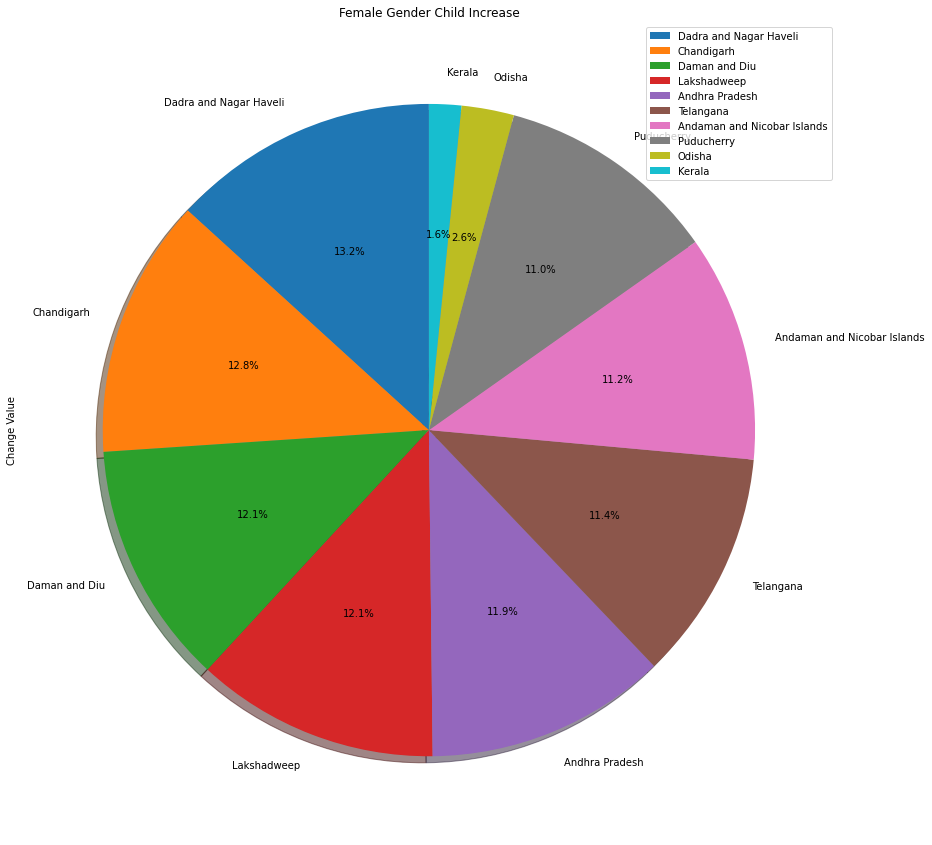

In [50]:
labels = Top10_Selected_State["state"]

Top10_Selected_State.plot(kind='pie',y = "Change Value", figsize=(15,15),labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90, title ="Female Gender Child Increase")

plt.savefig("Gender Increase Pie Chart")

In [51]:
Underweight_NFSH3 = UnderFed_NFHS3_Data[["Children_Underweight_5years(Weight-For-Age)"]]

Underweight_NFSH3_median = Underweight_NFSH3["Children_Underweight_5years(Weight-For-Age)"].median()

print(Underweight_NFSH3_median)

Underweight_NFSH3_min = Underweight_NFSH3["Children_Underweight_5years(Weight-For-Age)"].min()

print(Underweight_NFSH3_min)

Underweight_NFSH3_max = Underweight_NFSH3["Children_Underweight_5years(Weight-For-Age)"].max()

print(Underweight_NFSH3_max)

Underweight_NFSH3_quartile = Underweight_NFSH3["Children_Underweight_5years(Weight-For-Age)"].quantile([0.25,0.5,0.75])

Underweight_NFSH3_lowerquartile = Underweight_NFSH3_quartile[0.25]
print(Underweight_NFSH3_lowerquartile)
Underweight_NFSH3_upperquartile = Underweight_NFSH3_quartile[0.75]
print(Underweight_NFSH3_upperquartile)
Underweight_NFSH3_interquartile = Underweight_NFSH3_upperquartile - Underweight_NFSH3_lowerquartile
print(Underweight_NFSH3_interquartile)
low_outlier = Underweight_NFSH3_lowerquartile - (1.5*Underweight_NFSH3_interquartile)
print(low_outlier)
upper_outlier = Underweight_NFSH3_upperquartile + (1.5*Underweight_NFSH3_interquartile)
print(upper_outlier)



31.15
0.0
60.0
19.849999999999998
39.675000000000004
19.825000000000006
-9.887500000000014
69.41250000000002


In [53]:
Underweight_NFSH4 = UnderFed_NFHS4__Total_Data[["Children_Underweight_5years(Weight-For-Age)"]]

Underweight_NFSH4_median = Underweight_NFSH4["Children_Underweight_5years(Weight-For-Age)"].median()

print(Underweight_NFSH4_median)

Underweight_NFSH4_min = Underweight_NFSH4["Children_Underweight_5years(Weight-For-Age)"].min()

print(Underweight_NFSH4_min)

Underweight_NFSH4_max = Underweight_NFSH4["Children_Underweight_5years(Weight-For-Age)"].max()

print(Underweight_NFSH4_max)

Underweight_NFSH4_quartile = Underweight_NFSH4["Children_Underweight_5years(Weight-For-Age)"].quantile([0.25,0.5,0.75])

Underweight_NFSH4_lowerquartile = Underweight_NFSH4_quartile[0.25]
print(Underweight_NFSH4_lowerquartile)
Underweight_NFSH4_upperquartile = Underweight_NFSH4_quartile[0.75]
print(Underweight_NFSH4_upperquartile)
Underweight_NFSH4_interquartile = Underweight_NFSH4_upperquartile - Underweight_NFSH4_lowerquartile
print(Underweight_NFSH4_interquartile)
low_outlier = Underweight_NFSH4_lowerquartile - (1.5*Underweight_NFSH4_interquartile)
print(low_outlier)
upper_outlier = Underweight_NFSH4_upperquartile + (1.5*Underweight_NFSH4_interquartile)
print(upper_outlier)



26.85
11.9
47.8
21.6
35.400000000000006
13.800000000000004
0.899999999999995
56.10000000000001


In [82]:
Underweight_NFSH4_Rural = UnderFed_NFHS4__Rural_Data[["Children_Underweight_5years(Weight-For-Age)"]]

Underweight_NFSH4_Rural_median = Underweight_NFSH4_Rural["Children_Underweight_5years(Weight-For-Age)"].median()

print(Underweight_NFSH4_Rural_median)

Underweight_NFSH4_Rural_min = Underweight_NFSH4_Rural["Children_Underweight_5years(Weight-For-Age)"].min()

print(Underweight_NFSH4_Rural_min)

Underweight_NFSH4_Rural_max = Underweight_NFSH4_Rural["Children_Underweight_5years(Weight-For-Age)"].max()

print(Underweight_NFSH4_Rural_max)

Underweight_NFSH4_Rural_quartile = Underweight_NFSH4_Rural["Children_Underweight_5years(Weight-For-Age)"].quantile([0.25,0.5,0.75])

Underweight_NFSH4_Rural_lowerquartile = Underweight_NFSH4_Rural_quartile[0.25]
print(Underweight_NFSH4_Rural_lowerquartile)
Underweight_NFSH4_Rural_upperquartile = Underweight_NFSH4_Rural_quartile[0.75]
print(Underweight_NFSH4_Rural_upperquartile)
Underweight_NFSH4_Rural_interquartile = Underweight_NFSH4_Rural_upperquartile - Underweight_NFSH4_Rural_lowerquartile
print(Underweight_NFSH4_Rural_interquartile)
low_outlier = Underweight_NFSH4_Rural_lowerquartile - (1.5*Underweight_NFSH4_Rural_interquartile)
print(low_outlier)
upper_outlier = Underweight_NFSH4_Rural_upperquartile + (1.5*Underweight_NFSH4_Rural_interquartile)
print(upper_outlier)



28.5
0.0
49.8
20.349999999999998
37.875
17.525000000000002
-5.9375000000000036
64.1625


In [83]:
Underweight_NFSH4_Urban = UnderFed_NFHS4__Urban_Data[["Children_Underweight_5years(Weight-For-Age)"]]

Underweight_NFSH4_Urban_median = Underweight_NFSH4_Urban["Children_Underweight_5years(Weight-For-Age)"].median()

print(Underweight_NFSH4_Urban_median)

Underweight_NFSH4_Urban_min = Underweight_NFSH4_Urban["Children_Underweight_5years(Weight-For-Age)"].min()

print(Underweight_NFSH4_Urban_min)

Underweight_NFSH4_Urban_max = Underweight_NFSH4_Urban["Children_Underweight_5years(Weight-For-Age)"].max()

print(Underweight_NFSH4_Urban_max)

Underweight_NFSH4_Urban_quartile = Underweight_NFSH4_Urban["Children_Underweight_5years(Weight-For-Age)"].quantile([0.25,0.5,0.75])

Underweight_NFSH4_Urban_lowerquartile = Underweight_NFSH4_Urban_quartile[0.25]
print(Underweight_NFSH4_Urban_lowerquartile)
Underweight_NFSH4_Urban_upperquartile = Underweight_NFSH4_Urban_quartile[0.75]
print(Underweight_NFSH4_Urban_upperquartile)
Underweight_NFSH4_Urban_interquartile = Underweight_NFSH4_Urban_upperquartile - Underweight_NFSH4_Urban_lowerquartile
print(Underweight_NFSH4_Urban_interquartile)
low_outlier = Underweight_NFSH4_Urban_lowerquartile - (1.5*Underweight_NFSH4_Urban_interquartile)
print(low_outlier)
upper_outlier = Underweight_NFSH4_Urban_upperquartile + (1.5*Underweight_NFSH4_Urban_interquartile)
print(upper_outlier)



24.3
0.0
39.3
17.075000000000003
28.925
11.849999999999998
-0.6999999999999957
46.7


<Figure size 432x288 with 0 Axes>

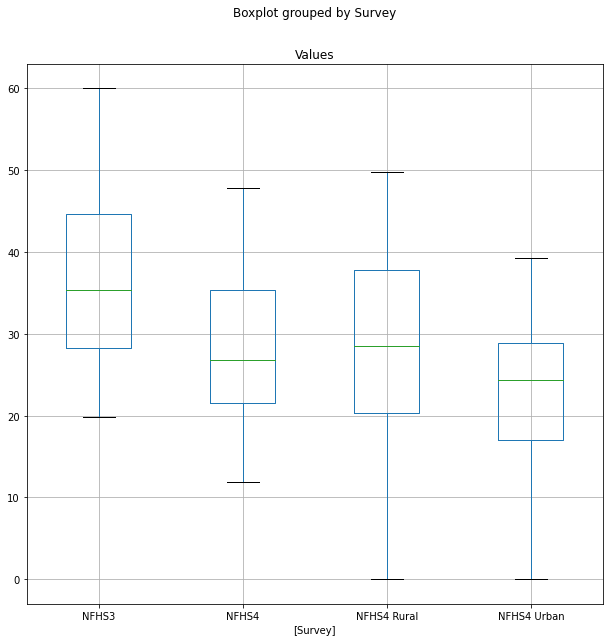

In [84]:
NFHS3 = pd.DataFrame({"Values":[31.15,60.0,19.8,39.6]})

NFHS4 = pd.DataFrame({"Values":[26.85,11.9,47.8,21.6,35.4]})

NFHS4Rural = pd.DataFrame({"Values":[28.5,0.0,49.8,20.3,37.8]})

NFHS4Urban = pd.DataFrame({"Values":[24.3,0.0,39.3,17.0,28.9]})

NFHS3["Survey"] = "NFHS3"
NFHS4["Survey"] = "NFHS4"
NFHS4Rural["Survey"] = "NFHS4 Rural"
NFHS4Urban["Survey"] = "NFHS4 Urban"

Values =[NFHS3,NFHS4,NFHS4Rural,NFHS4Urban]
AllValues = pd.concat(Values)
plt.figure()
AllValues.boxplot(by="Survey",figsize=(10,10))

plt.savefig("Bar Plots - NFHS3 Vs NFHS4")